In [1]:
#import required packages
import numpy as np
import pandas as pd
import math

import seaborn as sns
sns.set(context="notebook", palette="pastel", style = 'darkgrid' , font_scale = 2, color_codes=True)

import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load data set
raw_df = pd.read_csv('dataset/2020-covid-19-data.csv', sep=',')
raw_df.head(3)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,...,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,...,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN


In [ ]:
#check data set info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         9959 non-null   object 
 1   Location ISO Code            9959 non-null   object 
 2   Location                     9959 non-null   object 
 3   New Cases                    9959 non-null   int64  
 4   New Deaths                   9959 non-null   int64  
 5   New Recovered                9959 non-null   int64  
 6   New Active Cases             9959 non-null   int64  
 7   Total Cases                  9959 non-null   int64  
 8   Total Deaths                 9959 non-null   int64  
 9   Total Recovered              9959 non-null   int64  
 10  Total Active Cases           9959 non-null   int64  
 11  Location Level               9959 non-null   object 
 12  City or Regency              0 non-null      float64
 13  Province          

At a glance, we can categorize those columns into 4 section:

    1. Time
       Date, Time Zone
        
    2. Geographical, consists of:
       Location ISO Code, Location, Location Level, Continent, Country, Island, Province, Special Status, Longitude, Latitude, City or Regency, Total Cities, Total Regencies, Total Districts,  Total Urban Villages, Total Rural Villages, Area (km2)
        
    3. Characteristic of region:
       Population, Population Density
        
    4. Covid-19 case:
       New Cases, New Deaths, New Recovered, New Active Cases, Total Cases, Total Deaths, Total Recovered, Total Active Cases, New Cases per Million, Total Cases per Million, New Deaths per Million, Total Deaths per Million, Case Fatality Rate, Case Recovered Rate, Growth Factor of New Cases, Growth Factor of New Deaths 

In [ ]:
#check missing values
total_missing = raw_df.isnull().sum().sort_values(ascending=False)
percentage = (raw_df.isnull().sum()/raw_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percentage], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
City or Regency,9959,1.000000
Special Status,8516,0.855106
Growth Factor of New Deaths,1263,0.126820
Growth Factor of New Cases,889,0.089266
Total Rural Villages,306,0.030726
Time Zone,305,0.030626
Island,305,0.030626
Province,305,0.030626
Total Urban Villages,281,0.028216
Total Cities,279,0.028015


In [18]:
#check unique value of Population, and Population Density
check_2 = raw_df[['Population', 'Population Density']]
for column in check_2:
    print(raw_df[column].unique())
    print(raw_df[column].nunique())
    
#why do we have 35 unique values?

[ 10846145 265185520  45161325   6074100  10722374   2635461   3552191
   3631015  14874889  36364072  40479023   9426885   1847097   4340348
   1307803   5247257   2570289   9095591   2955567   5519245   1140701
    648407   1559984   8217551   4216171   5422814   3493357   4023049
   1379767   1929400   1999539   5270247   2641884   5411321   1180651]
35
[1.633431e+04 1.383400e+02 1.276550e+03 6.980000e+01 1.109640e+03
 6.923000e+01 2.752000e+01 1.158900e+03 2.038200e+02 1.108640e+03
 8.467800e+02 2.017800e+02 3.937000e+01 1.360000e+01 4.089000e+01
 9.054000e+01 1.674000e+01 2.627000e+02 4.779000e+01 1.313700e+02
 1.108000e+01 8.590000e+00 9.293000e+01 8.972000e+01 7.294300e+02
 3.681000e+01 6.979000e+01 1.038400e+02 8.401000e+01 2.352400e+02
 1.003800e+02 2.837700e+02 1.901700e+02 1.110700e+02 1.048800e+02]
35


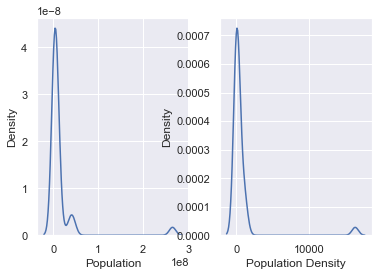

In [42]:
#distribution of Population and Population Density
fig, ax = plt.subplots(ncols=2)
sns.kdeplot(raw_df['Population'], ax=ax[0])
sns.kdeplot(raw_df['Population Density'], ax=ax[1])
plt.show()

# Problem Statement

The Indonesia central government will give the Covid-19 response fund, due to the funding limitless they ask us to prioritize the Covid-19 response fund according to Province's Covid-19 cases number.

Before cleaning data set, we would like to explore some columns:

'Date', 'Province', 'Population Density', 'New Deaths', 'New Recovered', 'New Active Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases', 'Case Fatality Rate', 'Case Recovered Rate'

In term of Clustering, we might use 'Province', 'New Deaths', 'New Recovered', 'New Active Cases', 'Case Fatality Rate', and Case Recovered Rate.

# Data Preparation

### Categorical features

In [ ]:
#print total unique value in province
#does province column provide observation in 34 provinces?
raw_df['Province'].nunique()
#yes, this column comprise of 34 provinces

34

if we look at the original CSV carefully, we can assume 'country in Location Level' variable causing the missing value in Province column

In [ ]:
#to prove above assumption let's count total of country in Location Level
raw_df['Location Level'].value_counts().reindex(['Province', 'Country'])
#if the answer is 305, then it would be exactly the same like missing value we encounter in Province
#so, our assumption was right
#now we can drop missing value directly in Province or just drop country in Location Level

Province    9654
Country      305
Name: Location Level, dtype: int64

In [25]:
#what happens after dropping NaN in province?
selected_1 = raw_df[['Date', 'Province', 'Population', 'Population Density', 'New Deaths', 'New Recovered', 'New Active Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases', 'Case Fatality Rate', 'Case Recovered Rate']].dropna(subset=['Province'])
selected_1.isnull().sum()

Date                   0
Province               0
Population             0
Population Density     0
New Deaths             0
New Recovered          0
New Active Cases       0
Total Deaths           0
Total Recovered        0
Total Active Cases     0
Case Fatality Rate     0
Case Recovered Rate    0
dtype: int64

In [26]:
#information of selected features
selected_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9654 entries, 0 to 9958
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 9654 non-null   object 
 1   Province             9654 non-null   object 
 2   Population           9654 non-null   int64  
 3   Population Density   9654 non-null   float64
 4   New Deaths           9654 non-null   int64  
 5   New Recovered        9654 non-null   int64  
 6   New Active Cases     9654 non-null   int64  
 7   Total Deaths         9654 non-null   int64  
 8   Total Recovered      9654 non-null   int64  
 9   Total Active Cases   9654 non-null   int64  
 10  Case Fatality Rate   9654 non-null   object 
 11  Case Recovered Rate  9654 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 980.5+ KB


In [27]:
#convert Case Fatality Rate, and Case Recovered Rate from percent string to float
selected_1[['Case Fatality Rate', 'Case Recovered Rate']] = selected_1[['Case Fatality Rate', 'Case Recovered Rate']].replace('%', '', regex=True).astype(float) / 100

In [28]:
selected_1.tail(3)

,Date,Province,Population,Population Density,New Deaths,New Recovered,New Active Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate
9956,12/31/2020,Sumatera Barat,5519245,131.37,3,26,88,522,18030,4912,0.0222,0.7684
9957,12/31/2020,Sumatera Selatan,8217551,89.72,1,50,41,599,9364,1863,0.0507,0.7918
9958,12/31/2020,Sumatera Utara,14874889,203.82,0,82,1,679,15403,2067,0.0374,0.8487


### Numerical features

In [29]:
selected_1.describe()

,Population,Population Density,New Deaths,New Recovered,New Active Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate
count,9.654000e+03,9654.000000,9654.000000,9654.000000,9654.000000,9654.000000,9654.000000,9654.000000,9654.000000,9654.000000
mean,7.971503e+06,786.620359,2.245908,62.019267,12.648850,223.194013,4809.059768,1239.256578,0.047170,0.622403
std,1.095091e+07,2838.262008,5.934605,171.138598,91.094608,574.154952,13614.519330,2301.669011,0.066704,0.480676
min,6.484070e+05,8.590000,0.000000,0.000000,-1741.000000,0.000000,0.000000,-113.000000,0.000000,0.000000
25%,1.999539e+06,47.790000,0.000000,0.000000,-2.000000,6.000000,107.000000,69.000000,0.017300,0.416400
50%,4.216171e+06,103.840000,0.000000,7.000000,1.000000,38.000000,703.000000,396.000000,0.033200,0.662800
75%,8.217551e+06,262.700000,2.000000,43.000000,20.000000,177.750000,3657.500000,1286.000000,0.053100,0.808500
max,4.516132e+07,16334.310000,91.000000,2671.000000,1652.000000,5827.000000,164776.000000,24143.000000,1.000000,10.000000


### Save changes into new CSV file

In [30]:
selected_1.to_csv('clean-data-upd.csv')

In [5]:
ready_df = pd.read_csv('dataset/clean-data-upd.csv', sep = ',')
#drop Unnamed: 0
ready_df.drop('Unnamed: 0', axis=1, inplace=True)
ready_df.tail(2)

,Date,Province,Population,Population Density,New Deaths,New Recovered,New Active Cases,Total Deaths,Total Recovered,Total Active Cases,Case Fatality Rate,Case Recovered Rate
9652,12/31/2020,Sumatera Selatan,8217551,89.72,1,50,41,599,9364,1863,0.0507,0.7918
9653,12/31/2020,Sumatera Utara,14874889,203.82,0,82,1,679,15403,2067,0.0374,0.8487


# Data Exploration

### Detect outliers

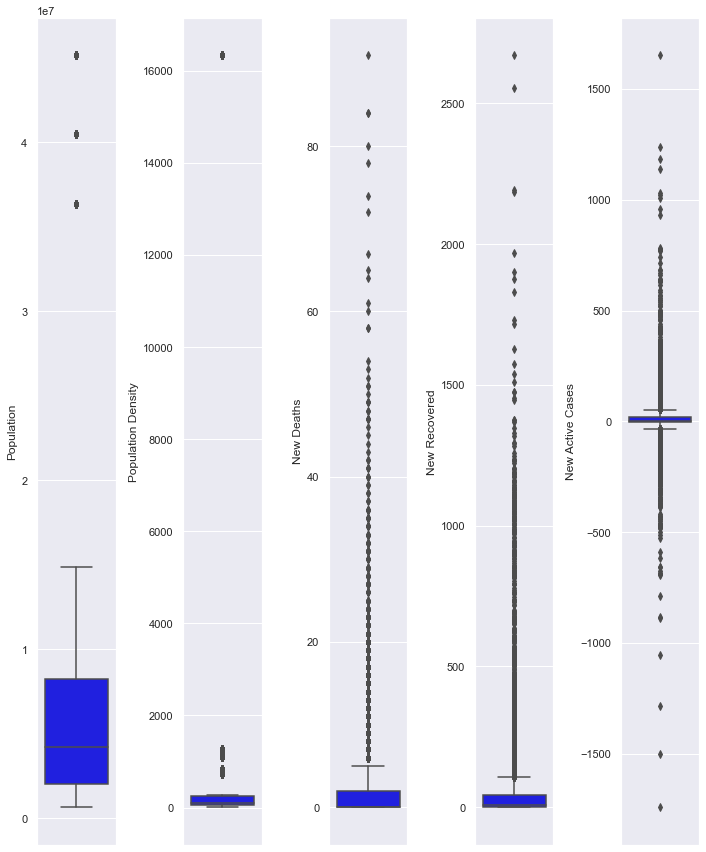

In [32]:
#deteck outliers in 'Population Density', 'New Deaths', 'New Recovered', 'New Active Cases'
part_1 = ['Population', 'Population Density', 'New Deaths', 'New Recovered', 'New Active Cases']
plt.figure(figsize=(12,12))
for i in range (len(part_1)):
    plt.subplot(1,6,i+1)
    sns.boxplot(y=ready_df[part_1[i]], color='blue', orient='v')
    plt.tight_layout()

In [34]:
#how many outliers detected in 'Population Density', 'New Deaths', 'New Recovered', 'New Active Cases'?
check_2 = ready_df[(ready_df['Population'] >= 3.5e+07) |
                    (ready_df['Population Density'] >= 16000) |
                    (ready_df['New Deaths'] > 80) |
                    (ready_df['New Recovered'] > 2500) |
                    (ready_df['New Active Cases'] > 1400)]

print('total of outliers detected are' + ' ' + str(check_2.shape[0]) + ' ' + 'rows')

total of outliers detected are 1190 rows


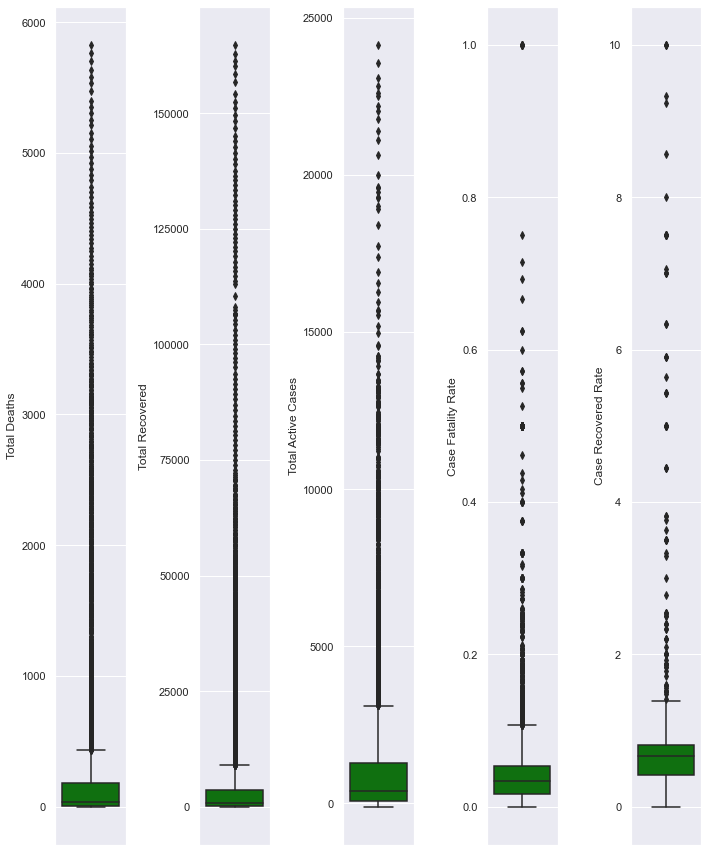

In [35]:
#detect outliers in 'Total Deaths', 'Total Recovered', 'Total Active Cases', 'Case Fatality Rate', 'Case Recovered Rate'
part_2 = ['Total Deaths', 'Total Recovered', 'Total Active Cases', 'Case Fatality Rate', 'Case Recovered Rate']
plt.figure(figsize=(12,12))
for i in range (len(part_2)):
    plt.subplot(1,6,i+1)
    sns.boxplot(y=ready_df[part_2[i]], color='green', orient='v')
    plt.tight_layout()

In [38]:
#how many outliers detected in 'Case Fatality Rate', 'Case Recovered Rate'?
check_2 = ready_df[(ready_df['Case Fatality Rate'] > 0.8) |
                (ready_df['Case Recovered Rate'] > 8)]

print('total of outliers detected are' + ' ' + str(check_2.shape[0]) + ' ' + 'rows')

total of outliers detected are 13 rows


Let them as the way they are, we can't treat them. Outliers will be generated into its unique cluster.

# Data Selection

In [ ]:
ready_df['Province'].value_counts()

#there's no rare label here

DKI Jakarta                   306
Riau                          305
Jawa Barat                    305
Banten                        301
Sulawesi Tenggara             297
Kalimantan Timur              293
Daerah Istimewa Yogyakarta    291
Sumatera Utara                290
Jawa Tengah                   289
Jawa Timur                    289
Sulawesi Selatan              288
Maluku                        285
Papua                         285
Maluku Utara                  284
Lampung                       281
Sumatera Barat                281
Sulawesi Tengah               281
Kalimantan Tengah             281
Aceh                          281
Papua Barat                   280
Kalimantan Utara              279
Sulawesi Barat                279
Sumatera Selatan              279
Bali                          278
Kalimantan Barat              278
Kepulauan Bangka Belitung     277
Kepulauan Riau                277
Jambi                         277
Kalimantan Selatan            277
Bengkulu      

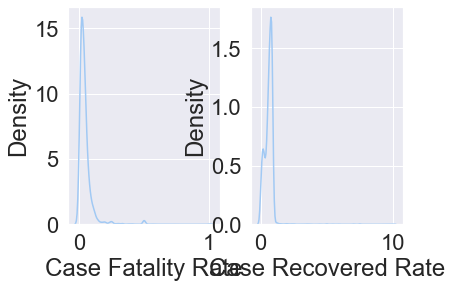

In [ ]:
#distribution of Case Fatality Rate and Case Recovered Rate
fig, ax = plt.subplots(ncols=2)
sns.kdeplot(ready_df['Case Fatality Rate'], ax=ax[0])
sns.kdeplot(ready_df['Case Recovered Rate'], ax=ax[1])
plt.show()

#these variables are skewed to the right. it would be better to perform median aggregation

In [ ]:
#groupby per province, focused on New Active Cases, New Recovered, and New Deaths
ready_new = ready_df.groupby('Province').agg({'New Active Cases': 'sum',
                                'New Recovered': 'sum',
                                'New Deaths': 'sum',
                                'Case Fatality Rate': 'median',
                                'Case Recovered Rate': 'median',
                                }, inplace=True)
ready_new.tail()

#for New Active Cases, New Recovered, and New Deaths we did sum aggregation
#because we wanna know total variable of each province from 2020-03-01 to 2020-12-31
#do these number make sense? yes, it does. just compared them with official report from satgas Covid-19

#meanwhile, we calculated median for Case Fatality Rate, and Case Recovered Rate
#because we wanna know median of each variable for each province during 9 months
#we don't use mean because of outliers

,New Active Cases,New Recovered,New Deaths,Case Fatality Rate,Case Recovered Rate
Province,,,,,
Sulawesi Tenggara,1064,6696,147,0.0169,0.65400
Sulawesi Utara,2357,7002,310,0.0442,0.59930
Sumatera Barat,4922,18020,522,0.0280,0.65540
Sumatera Selatan,1865,9363,597,0.0532,0.65790
Sumatera Utara,2060,15403,679,0.0464,0.41565


### what if we manipulate some variables

In [10]:
#groupby per province, focused on New Active Cases, New Recovered, and New Deaths
#add Population to it
group_new = ready_df.groupby('Province').agg({'Population': 'median',
                                'New Active Cases': 'sum',
                                'New Recovered': 'sum',
                                'New Deaths': 'sum',
                                'Case Fatality Rate': 'median',
                                'Case Recovered Rate': 'median',
                                }, inplace=True)
group_new.tail()

,Population,New Active Cases,New Recovered,New Deaths,Case Fatality Rate,Case Recovered Rate
Province,,,,,,
Sulawesi Tenggara,2635461.0,1064,6696,147,0.0169,0.65400
Sulawesi Utara,2641884.0,2357,7002,310,0.0442,0.59930
Sumatera Barat,5519245.0,4922,18020,522,0.0280,0.65540
Sumatera Selatan,8217551.0,1865,9363,597,0.0532,0.65790
Sumatera Utara,14874889.0,2060,15403,679,0.0464,0.41565


In [11]:
#data manipulation
#to reduce variance, let's divide New Active Cases, New Recovered, and New Deaths by its Population
group_new['New Active Cases Agg'] = group_new['New Active Cases']/group_new['Population']
group_new['New Recovered Agg'] = group_new['New Recovered']/group_new['Population']
group_new['New Deaths Agg'] = group_new['New Deaths']/group_new['Population']

In [12]:
#drop original column
group_new = group_new.drop(columns=['Population', 'New Active Cases', 'New Recovered', 'New Deaths'])
group_new.head()

,Case Fatality Rate,Case Recovered Rate,New Active Cases Agg,New Recovered Agg,New Deaths Agg
Province,,,,,
Aceh,0.03860,0.67500,0.000237,0.001362,0.000068
Bali,0.02055,0.79140,0.001103,0.002958,0.000110
Banten,0.04480,0.63610,0.000699,0.000952,0.000038
Bengkulu,0.05755,0.60675,0.000466,0.001280,0.000056
DKI Jakarta,0.03915,0.63560,0.001407,0.015189,0.000300


In [13]:
#save it to new CSV
group_new.to_csv('manipulated_features.csv')

# Exploratory Data Analysis

### Q1: Which variables that have strong positive correlation? and what kind of decision you could make after gaining that insight?

### Correlation matrix of numerical features

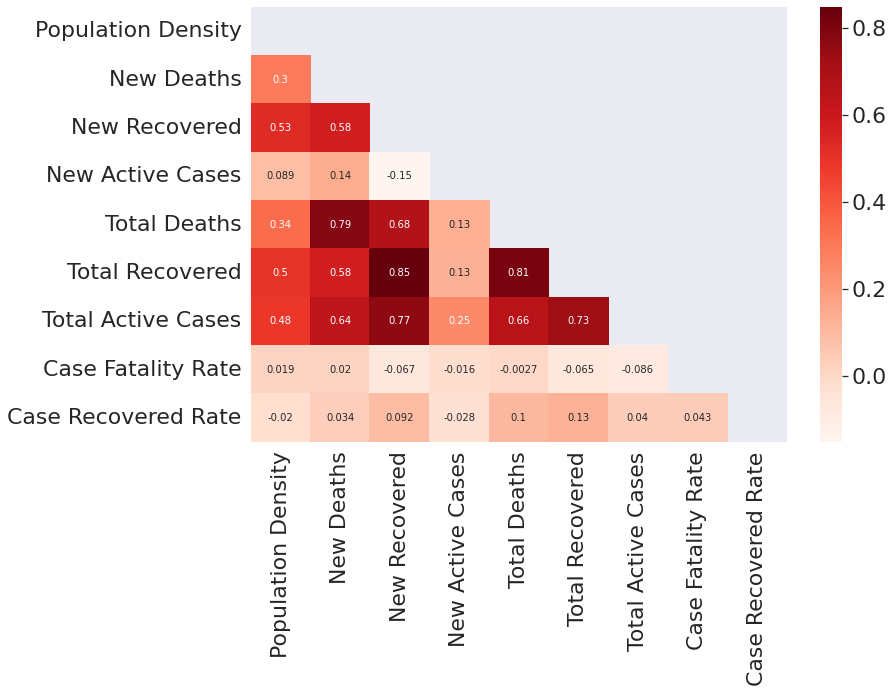

<Figure size 432x288 with 0 Axes>

In [ ]:
corr = ready_df.corr()
plt.figure(figsize=(12,8))
#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Reds", annot=True)
plt.show()
plt.savefig('1-korelasi-umum.jpg')

from above correlation matrix, we can conclude some points:

    1. Strong positive correlation occur between new recovered and total recovered, total deaths and total recovered, total deaths and new deaths
    
    2. Weak positive correlation occur between case fatality rate and population density, case recovered rate and total active cass, population density and total deaths 
    
    3. To avoid redundant features, it would be better to drop similar features for clustering. We would only use Province, New Deaths, New Recovered, New Active Cases, Case Fatality Rate, and Case Recovered Rate

### Scatter plot of some features

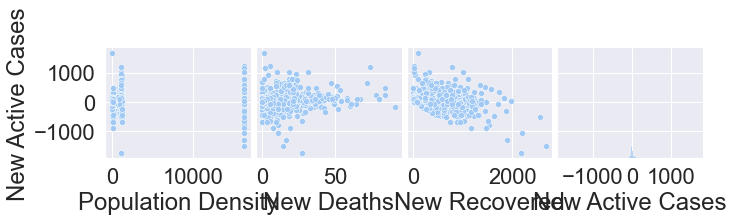

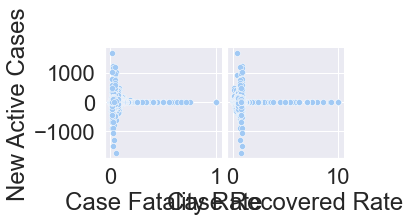

In [ ]:
relation_1 = ready_df[['Population Density', 'New Deaths', 'New Recovered', 'New Active Cases', 'Case Fatality Rate', 'Case Recovered Rate']]

subplots_col = 4
for i in range(0, len(relation_1.columns), subplots_col):
    sns.pairplot(data=relation_1,
                x_vars=relation_1.columns[i:i+subplots_col],
                y_vars=['New Active Cases'])

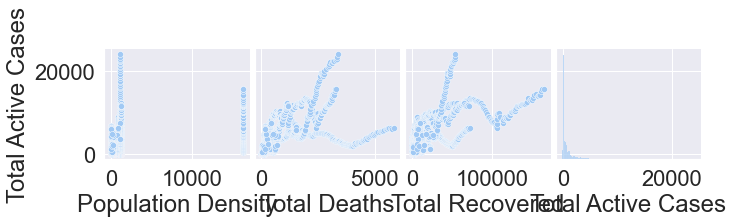

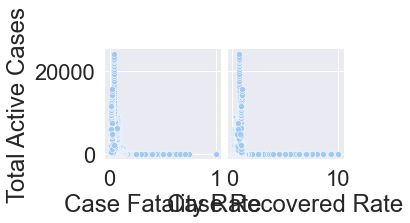

In [ ]:
relation_2 = ready_df[['Population Density', 'Total Deaths', 'Total Recovered', 'Total Active Cases', 'Case Fatality Rate', 'Case Recovered Rate']]

subplots_col = 4
for i in range(0, len(relation_2.columns), subplots_col):
    sns.pairplot(data=relation_2,
                x_vars=relation_2.columns[i:i+subplots_col],
                y_vars=['Total Active Cases'])

### Q2: Which 5 Province has the highest new active cases and 5 Province with the lowest new active cases? Show the result and visualize it

In [4]:
#5 Province with the highest new active cases
quest_2a = ready_df.groupby('Province')['New Active Cases'].sum()
quest_2a.sort_values(ascending=False).head(5)

Province
Jawa Tengah    24157
DKI Jakarta    15261
Jawa Barat     11627
Banten          7500
Jawa Timur      6154
Name: New Active Cases, dtype: int64

In [5]:
#5 Province with the lowest new active cases
quest_2b = ready_df.groupby('Province')['New Active Cases'].sum()
quest_2b.sort_values(ascending=True).head(5)

Province
Maluku Utara        329
Kalimantan Barat    349
Sulawesi Barat      355
Papua Barat         428
Gorontalo           432
Name: New Active Cases, dtype: int64

In [7]:
#save aggregation into new data frame
quest_2 = quest_2a.sort_values(ascending=False).reset_index()
quest_2.rename(columns={'Province': 'Provinsi',
                        'New Active Cases': 'Jumlah Kasus Aktif'}, inplace=True)
quest_2.head()

,Provinsi,Jumlah Kasus Aktif
0,Jawa Tengah,24157
1,DKI Jakarta,15261
2,Jawa Barat,11627
3,Banten,7500
4,Jawa Timur,6154


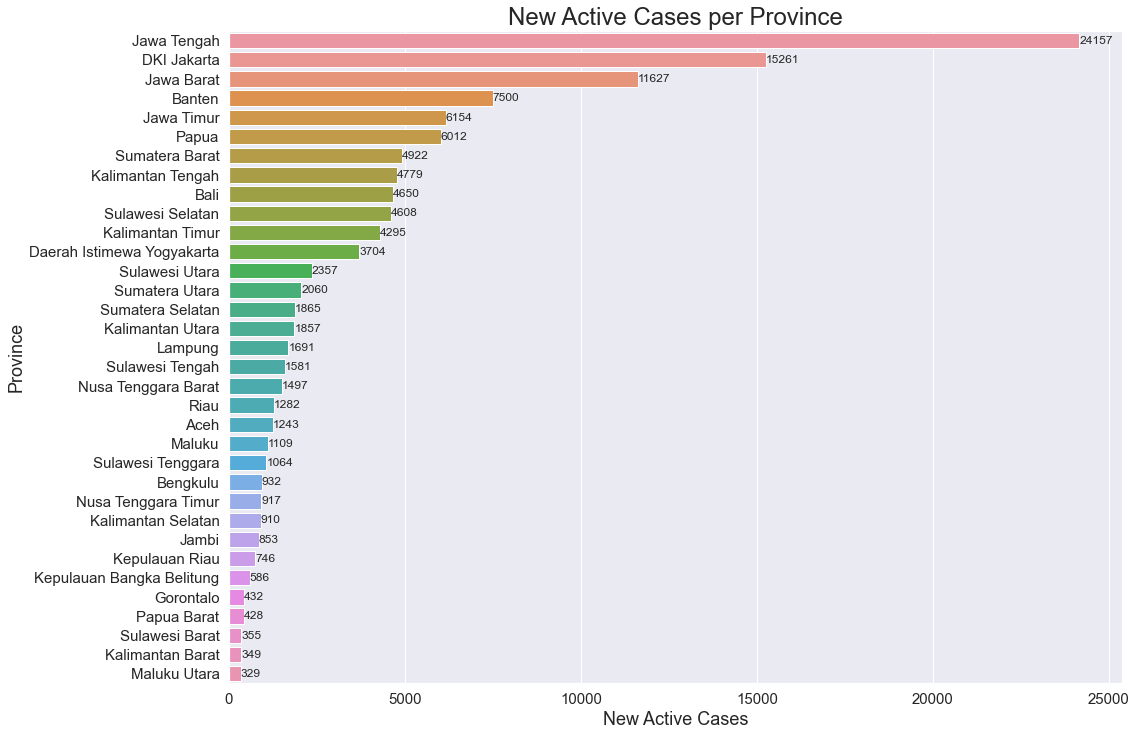

In [10]:
#visualize new active cases per province
#trying to sort it descending, also show its value
sns.set()
fig = plt.figure(figsize = (16,12))
g = sns.barplot(y='Provinsi',
                x='Jumlah Kasus Aktif',
                data=quest_2,
                ci=None)
g.bar_label(g.containers[0])
plt.title('New Active Cases per Province', fontsize = 24)
plt.xlabel('New Active Cases', fontsize = 18)
plt.ylabel('Province', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Conclusion:**
1.   Jawa Tengah, DKI Jakarta, Jawa Barat, Banten, and Jawa Timur are 5 province with the highest New Active Cases
2.   While, Maluku Utara, Kalimantan Barat, Sulawesi Barat, Papua Barat, and Gorontalo are 5 province with the lowest New Active Cases

### Q3: Sort province based on population density, what're top 5 Province with the highest case fatality rate and 5 Province with the lowest case fatality rate? Show the result and visualize it

In [11]:
#5 Province with the highest Case Fatality Rate sort by population density
quest_3a = ready_df.groupby(['Province', 'Population Density'])['Case Fatality Rate'].median()
quest_3a.sort_values(ascending=False).head(5)

Province             Population Density
Jawa Timur           846.78                0.07290
Jawa Tengah          1108.64               0.05870
Bengkulu             100.38                0.05755
Sumatera Selatan     89.72                 0.05320
Nusa Tenggara Barat  283.77                0.05180
Name: Case Fatality Rate, dtype: float64

In [12]:
#5 Province with the lowest Case Fatality Rate sort by population density
quest_3b = ready_df.groupby(['Province', 'Population Density'])['Case Fatality Rate'].median()
quest_3b.sort_values(ascending=True).head(5)

Province                   Population Density
Kalimantan Utara           8.59                  0.00920
Kalimantan Barat           36.81                 0.01055
Nusa Tenggara Timur        111.07                0.01100
Papua                      13.60                 0.01180
Kepulauan Bangka Belitung  84.01                 0.01290
Name: Case Fatality Rate, dtype: float64

In [13]:
#save aggregation into new data frame
quest_3 = quest_3a.sort_values(ascending=False).reset_index()
quest_3.rename(columns={'Province': 'Provinsi',
                        'Population Density': 'Kepadatan Populasi',
                        'Case Fatality Rate': 'Tingkat Kematian'}, inplace=True)
quest_3.tail()

,Provinsi,Kepadatan Populasi,Tingkat Kematian
29,Kepulauan Bangka Belitung,84.01,0.01290
30,Papua,13.60,0.01180
31,Nusa Tenggara Timur,111.07,0.01100
32,Kalimantan Barat,36.81,0.01055
33,Kalimantan Utara,8.59,0.00920


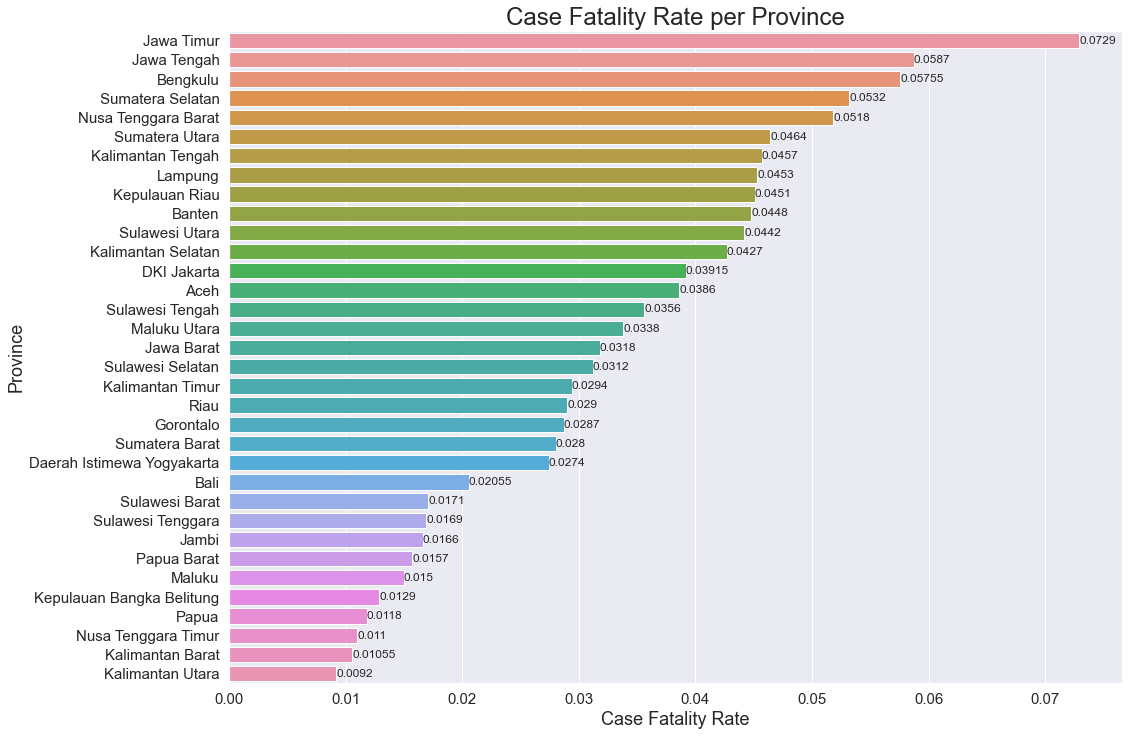

In [14]:
#visualize Case Fatality Rate per province
#trying to sort it descending, also show its value
sns.set()
fig = plt.figure(figsize = (16,12))
g = sns.barplot(y='Provinsi',
                x='Tingkat Kematian',
                data=quest_3,
                ci=None)
g.bar_label(g.containers[0])
plt.title('Case Fatality Rate per Province', fontsize = 24)
plt.xlabel('Case Fatality Rate', fontsize = 18)
plt.ylabel('Province', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Conclusion:**
Province with the highest Case Fatality Rate are Jawa Tengah, Jawa Timur, Bengkulu, Sumatera Selatan, and Nusa Tenggara Barat. Meanwhile province with the lowest Case Fatality Rate are Kalimantan Utara, Kalimantan Barat, Nusa Tenggara Timur, Papua, and Kepulauan Bangka Belitung.

### Q4: Grouped Bar Chart of New Active Cases, New Recovered, New Deaths of 5 Provinces (sort by Top 5 Lowest New Recovered)

In [15]:
##5 Province with the lowest New Recovered
quest_4 = ready_df.groupby(['Province'])['New Active Cases', 'New Recovered', 'New Deaths'].sum()
result_viz = quest_4.sort_values(ascending=True, by='New Recovered').head(5)
result_viz

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_8300\3385607372.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quest_4 = ready_df.groupby(['Province'])['New Active Cases', 'New Recovered', 'New Deaths'].sum()


,New Active Cases,New Recovered,New Deaths
Province,,,
Nusa Tenggara Timur,917,1200,50
Sulawesi Barat,355,1552,34
Kepulauan Bangka Belitung,586,1717,34
Sulawesi Tengah,1581,1865,106
Kalimantan Utara,1857,1881,56


In [16]:
#save it into new data frame
viz_4 = result_viz.reset_index()
viz_4.rename(columns={'Province': 'Provinsi',
                    'New Active Cases': 'Jumlah Kasus Aktif',
                    'New Recovered': 'Jumlah Kasus Sembuh',
                    'New Deaths': 'Jumlah Kasus Meninggal'}, inplace=True)
viz_4

,Provinsi,Jumlah Kasus Aktif,Jumlah Kasus Sembuh,Jumlah Kasus Meninggal
0,Nusa Tenggara Timur,917,1200,50
1,Sulawesi Barat,355,1552,34
2,Kepulauan Bangka Belitung,586,1717,34
3,Sulawesi Tengah,1581,1865,106
4,Kalimantan Utara,1857,1881,56


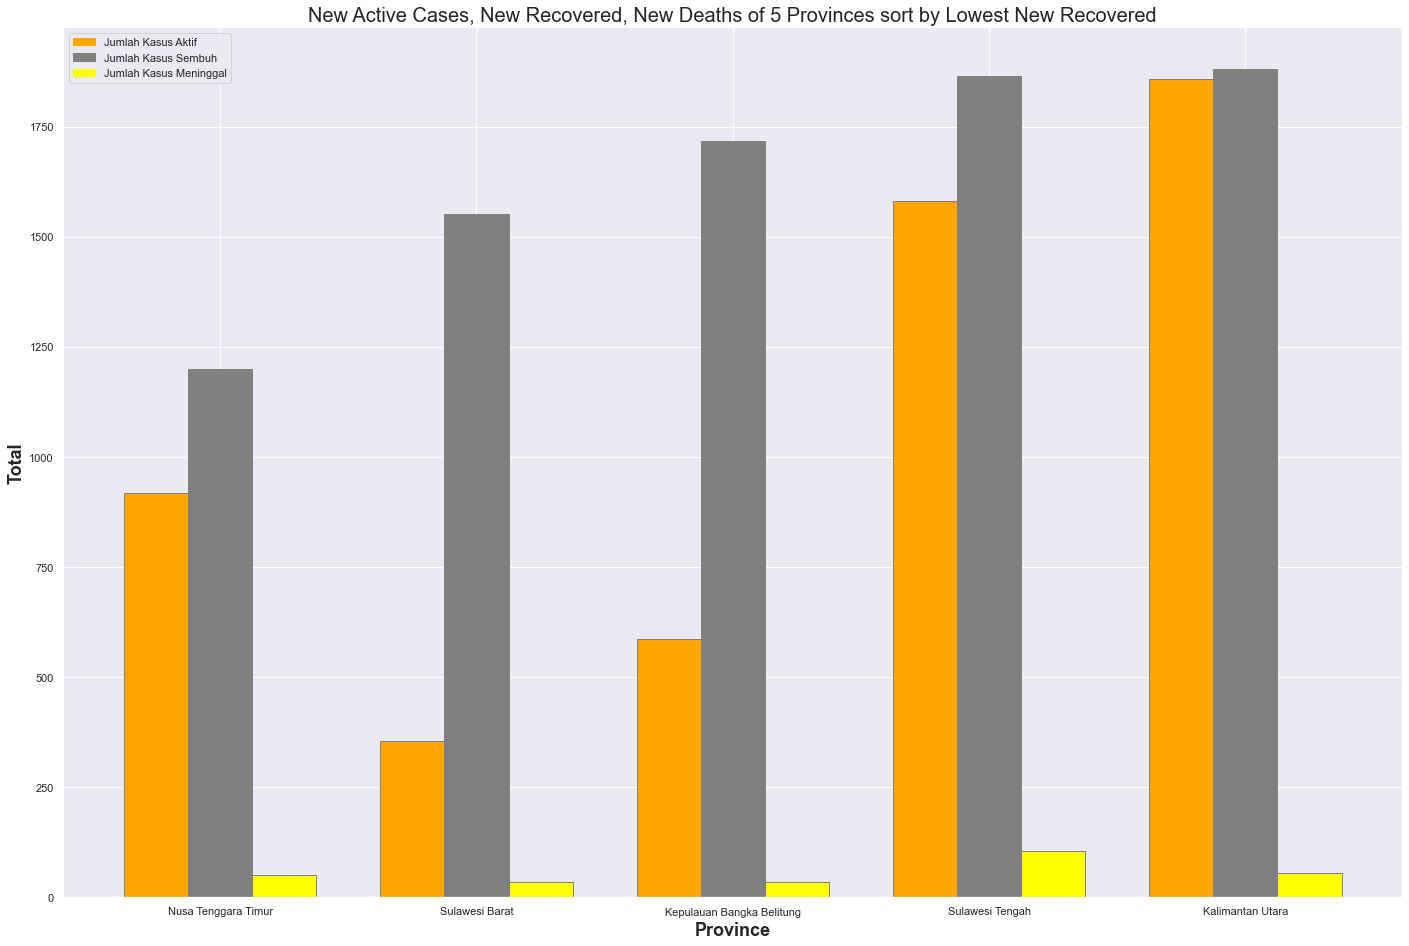

In [17]:
#set up legends
colors = {'Jumlah Kasus Aktif': 'orange',
         'Jumlah Kasus Sembuh': 'grey',
         'Jumlah Kasus Meninggal': 'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

#set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(24, 16))

#set height of bar
NumActiveCases = viz_4['Jumlah Kasus Aktif']
NumRecovered = viz_4['Jumlah Kasus Sembuh']
NumDeaths = viz_4['Jumlah Kasus Meninggal']

#set position of bar on X axis
br1 = np.arange(len(NumActiveCases))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

#make the plot
plt.bar(br1, NumActiveCases, color ='orange', width = barWidth,
        edgecolor ='grey', label ='NumActiveCases')
plt.bar(br2, NumRecovered, color ='grey', width = barWidth,
        edgecolor ='grey', label ='NumRecovered')
plt.bar(br3, NumDeaths, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='NumDeaths')

#adding Xticks
plt.title('New Active Cases, New Recovered, New Deaths of 5 Provinces sort by Lowest New Recovered', fontsize = 20)
plt.xlabel('Province', fontweight ='bold', fontsize = 18)
plt.ylabel('Total', fontweight ='bold', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(NumActiveCases))],
        ['Nusa Tenggara Timur', 'Sulawesi Barat', 'Kepulauan Bangka Belitung', 'Sulawesi Tengah', 'Kalimantan Utara'])
 
plt.legend(handles, labels)
plt.show()

From above grouped bar chart, we can conclude that in the top 5 province sort by lowest New Recovered, the number of new recovered are higher than the number of new death, even though the number of new active cases inreased.

### Q5: How's the trend of New Active Cases, New Recovered, New Deaths during 10 months? 

In [6]:
import time
import datetime

In [7]:
#convert 'Date' from object to datetime
ready_df['Date'] = ready_df['Date'].apply(pd.to_datetime)
ready_df['Date']

0      2020-03-01
1      2020-03-02
2      2020-03-02
3      2020-03-02
4      2020-03-03
          ...    
9649   2020-12-31
9650   2020-12-31
9651   2020-12-31
9652   2020-12-31
9653   2020-12-31
Name: Date, Length: 9654, dtype: datetime64[ns]

In [8]:
#ignoring Province, focus on Date
monthly_agg = ready_df.resample('M', on='Date').agg({'New Active Cases': 'sum',
                                'New Recovered': 'sum',
                                'New Deaths': 'sum',
                                'Case Fatality Rate': 'median',
                                'Case Recovered Rate': 'median'})
monthly_agg.rename(columns={'New Active Cases': 'Kasus Aktif',
                                'New Recovered': 'Kasus Sembuh',
                                'New Deaths': 'Kasus Meninggal',
                                'Case Fatality Rate': 'Peluang Meninggal',
                                'Case Recovered Rate': 'Peluang Sembuh',
                                }, inplace=True)
monthly_agg

,Kasus Aktif,Kasus Sembuh,Kasus Meninggal,Peluang Meninggal,Peluang Sembuh
Date,,,,,
2020-03-31,644,74,162,0.07870,0.22220
2020-04-30,6437,1430,584,0.09030,0.18940
2020-05-31,9695,5695,819,0.04690,0.25810
2020-06-30,10822,17653,1304,0.04085,0.47900
2020-07-31,9067,40990,2231,0.03500,0.63895
2020-08-31,3997,60080,2283,0.03080,0.67790
2020-09-30,19790,89131,3334,0.02870,0.71960
2020-10-31,-2997,122968,3161,0.02650,0.76700
2020-11-30,15171,110589,3089,0.02580,0.81090


In [ ]:
#data frame information
monthly_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-03-31 to 2020-12-31
Freq: M
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kasus Aktif        10 non-null     int64  
 1   Kasus Sembuh       10 non-null     int64  
 2   Kasus Meninggal    10 non-null     int64  
 3   Peluang Meninggal  10 non-null     float64
 4   Peluang Sembuh     10 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 480.0 bytes


In [9]:
#we will save new df into new CSV file to avoid error
monthly_agg.to_csv('monthly_agg_EDA.csv')

In [10]:
#read csv
ready_monthly = pd.read_csv('dataset/monthly_agg_EDA.csv')
ready_monthly.tail()

,Date,Kasus Aktif,Kasus Sembuh,Kasus Meninggal,Peluang Meninggal,Peluang Sembuh
5,2020-08-31,3997,60080,2283,0.0308,0.6779
6,2020-09-30,19790,89131,3334,0.0287,0.7196
7,2020-10-31,-2997,122968,3161,0.0265,0.7670
8,2020-11-30,15171,110589,3089,0.0258,0.8109
9,2020-12-31,49486,150124,4715,0.0241,0.7970


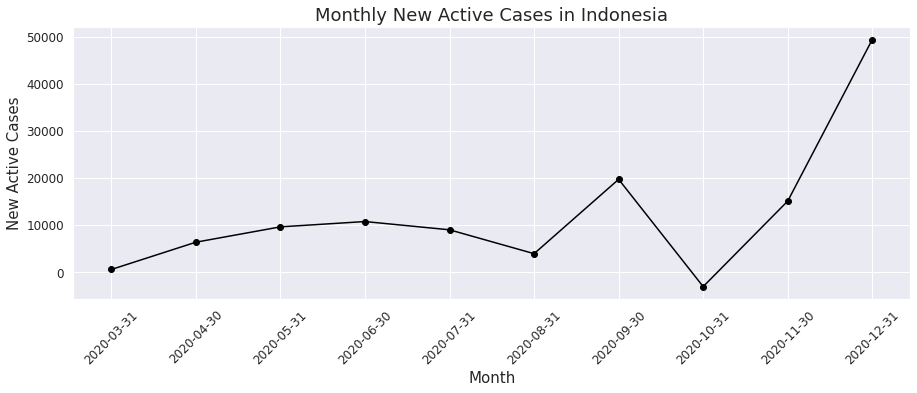

In [ ]:
#visualizing 'Monthly New Active Cases'
plt.figure(figsize = (15,5))
plt.plot(ready_monthly['Date'], ready_monthly['Kasus Aktif'], color='black', marker='o')
plt.title('Monthly New Active Cases in Indonesia', fontsize = 18)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('New Active Cases', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

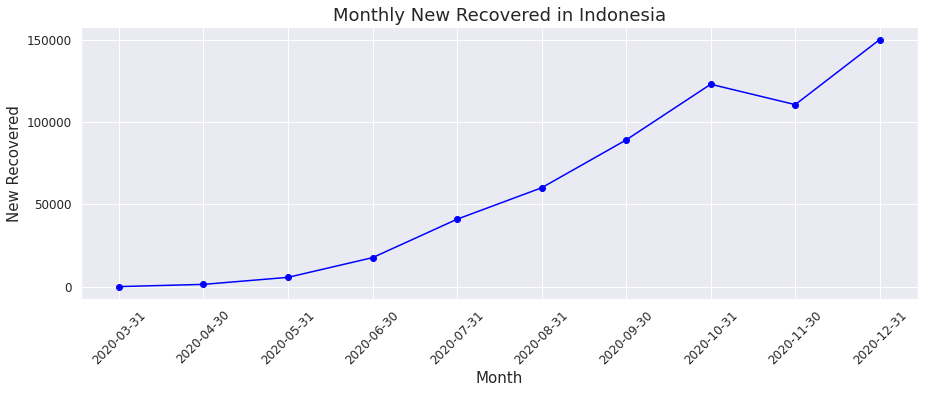

In [ ]:
#visualizing 'Monthly New Recovered'
plt.figure(figsize = (15,5))
plt.plot(ready_monthly['Date'], ready_monthly['Kasus Sembuh'], color='blue', marker='o')
plt.title('Monthly New Recovered in Indonesia', fontsize = 18)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('New Recovered', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

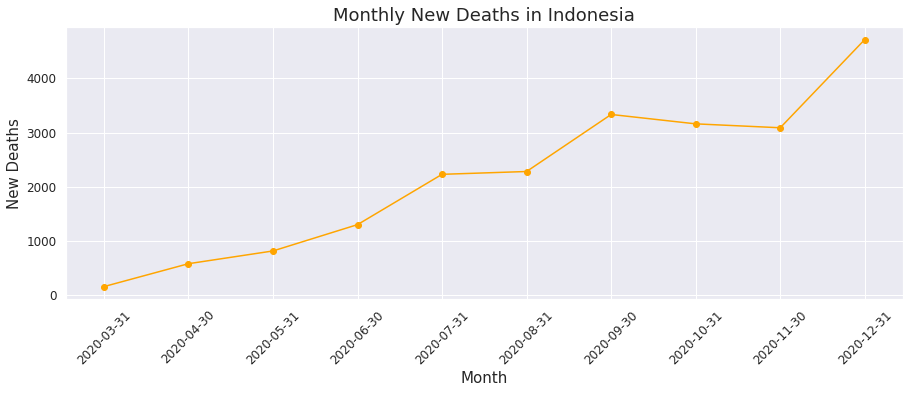

In [ ]:
#visualizing 'Monthly New Deaths'
plt.figure(figsize = (15,5))
plt.plot(ready_monthly['Date'], ready_monthly['Kasus Meninggal'], color='orange', marker='o')
plt.title('Monthly New Deaths in Indonesia', fontsize = 18)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('New Deaths', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

According to the above plot (from March 2020 - December 2020), we can conclude some points:

1. Trend of 'Monthly New Active Cases in Indonesia' shows intense increasement in December 2020.
    
2. The amount of 'Monthly New Recovered in Indonesia' keep increasing per month, with assumption the more resident get infected the more resident will get recovered too.
    
3. The amount of 'Monthly New Deaths in Indonesia' also keep increasing per month, we assume that the more resident get infected, the more resident will get recovered too, but it also followed by the number increasement of dead resident.

_Thanks for reading, modeling will be continued in separated notebook._